In [1]:
# turning cost が古かったので新しいので再実験

In [2]:
import re
import sys
from time import sleep
from pprint import pprint
from functools import partial

import numpy as np
import optuna
try:
    import pandas as pd
except:
    pass


FILENAME = "ensemble2_best_fix.cpp"

In [4]:
#!cp ../main.cpp ./{FILENAME}

In [5]:
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out

ensemble2_best_fix.cpp:458: warning: ignoring #pragma warning  [-Wunknown-pragmas]
  458 | #pragma warning( disable : 4146 )
      | 
ensemble2_best_fix.cpp: In member function ‘void UltimateEstimator::Step()’:
ensemble2_best_fix.cpp:1149:39: warning: comparison of integer expressions of different signedness: ‘signed char’ and ‘std::array<double, 60>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
 1149 |   for (auto col = (signed char)0; col < data_x.size(); col++) {
      |                                   ~~~~^~~~~~~~~~~~~~~
ensemble2_best_fix.cpp:1107:8: warning: unused variable ‘estimated_distance’ [-Wunused-variable]
 1107 |   auto estimated_distance = 0.0;
      |        ^~~~~~~~~~~~~~~~~~
ensemble2_best_fix.cpp: In member function ‘void Explorer::Step()’:
ensemble2_best_fix.cpp:1465:30: warning: narrowing conversion of ‘(((int)v.Explorer::Node::y) + 1)’ from ‘int’ to ‘signed char’ [-Wnarrowing]
 1465 |     const auto u = Node{ v.y + (i8)1, v.x, false };
      |         

In [6]:
%%time

scores = []
for i in range(200, 1000):
    i = f"{i:04d}"
    score = !cargo run --release --manifest-path ../tools/Cargo.toml --bin tester ../exp004_ultimate/in/{i}.txt $(pwd)/{FILENAME}.out 2>&1 | grep Score
    print(i, *score)
    score = int(score[0].split()[-1])
    scores.append(score)
np.mean(scores) / 1e6, np.std(scores) / 1e6

0200 Score = 966087145
0201 Score = 977911056
0202 Score = 981324000
0203 Score = 973195382
0204 Score = 984082405
0205 Score = 973251237
0206 Score = 969586563
0207 Score = 963015624
0208 Score = 964633191
0209 Score = 969443314
0210 Score = 966598866
0211 Score = 985517971
0212 Score = 966225714
0213 Score = 980114778
0214 Score = 984459017
0215 Score = 967141185
0216 Score = 984585228
0217 Score = 978090644
0218 Score = 948443450
0219 Score = 968133619
0220 Score = 948790662
0221 Score = 963036598
0222 Score = 980461438
0223 Score = 972134879
0224 Score = 976020827
0225 Score = 964970039
0226 Score = 987319035
0227 Score = 962926919
0228 Score = 971980361
0229 Score = 965715185
0230 Score = 970405918
0231 Score = 974109808
0232 Score = 959823943
0233 Score = 964549908
0234 Score = 970018130
0235 Score = 979010096
0236 Score = 960781323
0237 Score = 974617834
0238 Score = 954532226
0239 Score = 977003380
0240 Score = 976411454
0241 Score = 961363154
0242 Score = 975251026
0243 Score 

0557 Score = 965540672
0558 Score = 967143379
0559 Score = 957227550
0560 Score = 979771992
0561 Score = 980754714
0562 Score = 971593501
0563 Score = 976626841
0564 Score = 971259303
0565 Score = 968876841
0566 Score = 947449336
0567 Score = 961597101
0568 Score = 959064398
0569 Score = 982059683
0570 Score = 974037147
0571 Score = 949043441
0572 Score = 962317720
0573 Score = 981438716
0574 Score = 966336184
0575 Score = 974189962
0576 Score = 964782036
0577 Score = 967332724
0578 Score = 950635488
0579 Score = 967500886
0580 Score = 973835930
0581 Score = 955322972
0582 Score = 969702705
0583 Score = 948565582
0584 Score = 966466512
0585 Score = 957848215
0586 Score = 971843649
0587 Score = 964240552
0588 Score = 970466518
0589 Score = 965302129
0590 Score = 974912734
0591 Score = 980547332
0592 Score = 973043936
0593 Score = 965510630
0594 Score = 966905353
0595 Score = 971161497
0596 Score = 973843510
0597 Score = 984443223
0598 Score = 974491571
0599 Score = 983807351
0600 Score 

0914 Score = 962140420
0915 Score = 968802961
0916 Score = 983542771
0917 Score = 986505246
0918 Score = 975630927
0919 Score = 960840652
0920 Score = 973693602
0921 Score = 966674049
0922 Score = 965384633
0923 Score = 956080617
0924 Score = 978334241
0925 Score = 949932921
0926 Score = 973471935
0927 Score = 968125706
0928 Score = 978154319
0929 Score = 967227589
0930 Score = 969007498
0931 Score = 963473908
0932 Score = 987756316
0933 Score = 967619638
0934 Score = 968430396
0935 Score = 972357769
0936 Score = 979203956
0937 Score = 977206530
0938 Score = 969687394
0939 Score = 950760978
0940 Score = 980092684
0941 Score = 976333457
0942 Score = 963924674
0943 Score = 982535957
0944 Score = 980765775
0945 Score = 961472245
0946 Score = 972703662
0947 Score = 959103968
0948 Score = 959713594
0949 Score = 967852134
0950 Score = 959595091
0951 Score = 963672237
0952 Score = 966754417
0953 Score = 987697612
0954 Score = 983021486
0955 Score = 968760761
0956 Score = 971216384
0957 Score 

(971.25826025, 9.6440894242667)

In [ ]:
# 元: (971.09609432875, 9.347464001440587)
# mean: (971.3222888075001, 9.501728723891063)
# best: (971.5599666325, 9.647714176549067)

(971.25826025, 9.6440894242667)
# やっぱ小さいと不安定か…

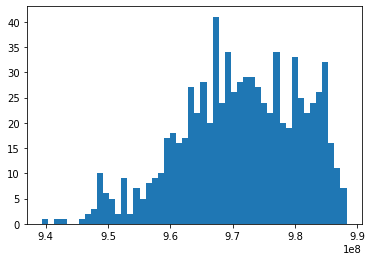

In [7]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)
plt.show()